In [1]:
import pandas as pd

In [2]:
import glob
frac = 0.01
# path ='./data/RFReg_' # use your path
path ='./../data/Pobreza/pobreza_' # use your path

allFiles = []
allFiles += glob.glob(path+str(frac)+'_q*.csv')
allFiles = sorted(allFiles)
# allFiles[-23:]

In [3]:
data_list = []

for f in allFiles[-23:]:
    print(f)
    data = pd.read_csv(f, usecols = ['ANO4', 'Q', 'CONDACT', 'CAT_OCUP', 'PP07K', 'AGLOMERADO'])
    data['AGLO_si'] = data.AGLOMERADO != 0
    
    data_list += [data]
    
data = pd.concat(data_list)

./../data/Pobreza/pobreza_0.01_q2016-05-15.csv
./../data/Pobreza/pobreza_0.01_q2016-08-15.csv
./../data/Pobreza/pobreza_0.01_q2016-11-15.csv
./../data/Pobreza/pobreza_0.01_q2017-02-15.csv
./../data/Pobreza/pobreza_0.01_q2017-05-15.csv
./../data/Pobreza/pobreza_0.01_q2017-08-15.csv
./../data/Pobreza/pobreza_0.01_q2017-11-15.csv
./../data/Pobreza/pobreza_0.01_q2018-02-15.csv
./../data/Pobreza/pobreza_0.01_q2018-05-15.csv
./../data/Pobreza/pobreza_0.01_q2018-08-15.csv
./../data/Pobreza/pobreza_0.01_q2018-11-15.csv
./../data/Pobreza/pobreza_0.01_q2019-02-15.csv
./../data/Pobreza/pobreza_0.01_q2019-05-15.csv
./../data/Pobreza/pobreza_0.01_q2019-08-15.csv
./../data/Pobreza/pobreza_0.01_q2019-11-15.csv
./../data/Pobreza/pobreza_0.01_q2020-02-15.csv
./../data/Pobreza/pobreza_0.01_q2020-05-15.csv
./../data/Pobreza/pobreza_0.01_q2020-08-15.csv
./../data/Pobreza/pobreza_0.01_q2020-11-15.csv
./../data/Pobreza/pobreza_0.01_q2021-02-15.csv
./../data/Pobreza/pobreza_0.01_q2021-05-15.csv
./../data/Pob

In [4]:
df = data.loc[data.AGLOMERADO != 0]


In [5]:
# x = df.CONDACT.value_counts()
# x/x.sum()

In [6]:
p0 = df.groupby(['ANO4', 'Q']).size().reset_index(name='Pob Tot')

p1 = df.groupby(['ANO4', 'Q']).apply(lambda x: (x['CONDACT'].isin([0, 3])).sum()).reset_index(name='Inactivos')

p2 = df.groupby(['ANO4', 'Q']).apply(lambda x: (x['CONDACT'].isin([1, 2])).sum()).reset_index(name='PEA')

p3 = df.groupby(['ANO4', 'Q']).apply(lambda x: (x['CONDACT'] == 1).sum()).reset_index(name='Ocupados')

p4 = df.groupby(['ANO4', 'Q']).apply(lambda x: (x['CONDACT'] == 2).sum()).reset_index(name='Desocupados')

p5 = df.groupby(['ANO4', 'Q']).apply(lambda x: ((x['CONDACT'] == 1) & (x['CAT_OCUP'] == 3)).sum()).reset_index(name='Asalariados')

p6 = df.groupby(['ANO4', 'Q']).apply(lambda x: ((x['CONDACT'] == 1) & (x['CAT_OCUP'] != 3)).sum()).reset_index(name='No Asalariados')

p7 = df.groupby(['ANO4', 'Q']).apply(lambda x: ((x['CONDACT'] == 1) & 
                                           (x['CAT_OCUP'] == 3) &
                                          (x['PP07K'] != 4)).sum()).reset_index(name='Formales')

p8 = df.groupby(['ANO4', 'Q']).apply(lambda x: ((x['CONDACT'] == 1) & 
                                           (x['CAT_OCUP'] == 3) &
                                          (x['PP07K'] == 4)).sum()).reset_index(name='Informales')

In [7]:
info = p0.merge(p1).merge(p2).merge(p3).merge(p4).merge(p5).merge(p6).merge(p7).merge(p8)

In [8]:
info = info.set_index(['ANO4', 'Q'])
info = info/frac

In [9]:
info['Tasa Empleo'] = info['Ocupados']/info['Pob Tot']
info['Tasa Activ'] = info['PEA']/info['Pob Tot']
info['Tasa Desoc'] = info['Desocupados']/info['PEA']

In [10]:
import matplotlib.pyplot as plt

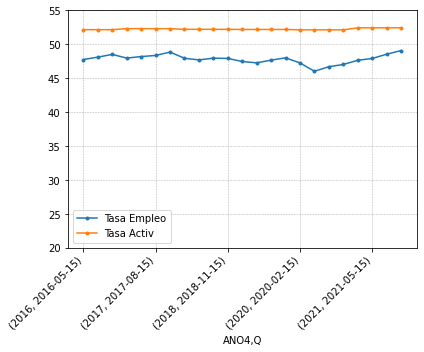

In [17]:

fig, axs = plt.subplots(1, figsize = (6, 5))

(100*info[['Tasa Empleo', 'Tasa Activ']]).plot(marker = '.', ax = axs)

axs.set_ylim(20, 55)
axs.grid(lw = .5, linestyle = '--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test1.jpg')
plt.show()

In [12]:
info[['Tasa Empleo', 'Tasa Activ', 'Tasa Desoc']].round(3)*100


Tasa Empleo  Tasa Activ  Tasa Desoc
ANO4 Q                                              
2016 2016-05-15         47.8        52.2         8.4
     2016-08-15         48.1        52.2         7.8
     2016-11-15         48.5        52.2         7.0
2017 2017-02-15         48.0        52.3         8.3
     2017-05-15         48.2        52.3         7.9
     2017-08-15         48.4        52.3         7.6
     2017-11-15         48.8        52.3         6.6
2018 2018-02-15         47.9        52.2         8.2
     2018-05-15         47.7        52.2         8.6
     2018-08-15         48.0        52.2         8.1
     2018-11-15         47.9        52.2         8.2
2019 2019-02-15         47.5        52.2         9.1
     2019-05-15         47.3        52.2         9.4
     2019-08-15         47.7        52.2         8.7
     2019-11-15         48.0        52.2         8.0
2020 2020-02-15         47.3        52.1         9.4
     2020-05-15         46.0        52.1        11.7
     2020-08-15         46.7        52.1        10.4
     2020-11-15         47.0        52.1         9.8
2021 2021-02-15         47.6        52.4         9.1
     2021-05-15         47.9        52.4         8.6
     2021-08-15         48.5        52.4         7.4
     2021-11-15         49.1        52.4         6.4

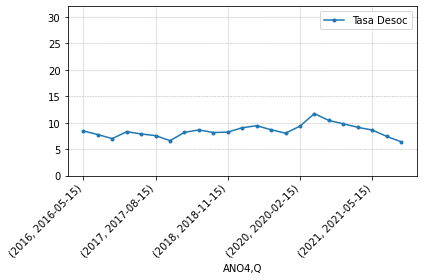

In [18]:


fig, axs = plt.subplots(1, figsize = (6, 4))

(100*info[['Tasa Desoc']]).plot(marker = '.', ax = axs)

axs.set_ylim(0, 32)
axs.grid(lw = .5, linestyle = '--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('test2.jpg')
plt.show()